In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
a_ce_dw = pd.read_csv('./magazine/final/a_ce_dw.csv', sep = '|', encoding = 'utf-8')
b_ce_dw = pd.read_csv('./magazine/final/b_ce_dw.csv', sep = '|', encoding = 'utf-8')
c_ce_dw = pd.read_csv('./magazine/final/c_ce_dw.csv', sep = '|', encoding = 'utf-8')
e_ce_dw = pd.read_csv('./magazine/final/e_ce_dw.csv', sep = '|', encoding = 'utf-8')
fb_ce_dw = pd.read_csv('./magazine/final/fb_ce_dw.csv', sep = '|', encoding = 'utf-8')
fn_ce_dw = pd.read_csv('./magazine/final/fn_ce_dw.csv', sep = '|', encoding = 'utf-8')
m_ce_dw = pd.read_csv('./magazine/final/m_ce_dw.csv', sep = '|', encoding = 'utf-8')
v_ce_dw = pd.read_csv('./magazine/final/v_ce_dw.csv', sep = '|', encoding = 'utf-8')
w_ce_dw = pd.read_csv('./magazine/final/w_ce_dw.csv', sep = '|', encoding = 'utf-8')

In [4]:
ce_dw = pd.concat([a_ce_dw, b_ce_dw, c_ce_dw, e_ce_dw, fb_ce_dw, fn_ce_dw, m_ce_dw, v_ce_dw, w_ce_dw])

In [5]:
ce_dw.reset_index(drop=True, inplace = True)

In [6]:
len(ce_dw)

764

In [7]:
ce_dw.loc[89, 'contents'] = ce_dw.loc[89, 'contents'].replace('💍', '')

In [8]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '')

In [9]:
ce_dw.to_csv('ce_dwr.csv', encoding = 'utf-8', index = False, sep ='|')

## list(article_list) 생성 후 append

In [10]:
articles = ce_dw['word_celine']

In [11]:
magazine_list = []
article_list = []

for article in articles:
    article_list.append(article)

In [12]:
len(article_list)

764

In [13]:
article_list[89] = article_list[89].replace('💍', '')

## konlpy 패키지 안에 Kkma 모듈 호출

In [1]:
from konlpy.tag import Kkma

In [ ]:
kkma = Kkma()

### 각 문장별로 형태소 구분하기

In [ ]:
sentences_tag = []

for i in range(10):
    morph = kkma.pos(article_list[i])
    sentences_tag.append(morph)
    print(i, end = ' ')
    
    

print(len(sentences_tag))


In [ ]:
sentences_tag[0]

### 1. 명사 혹은 형용사인 품사만 선별해 리스트에 담기

In [13]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective']:
            noun_adj_list.append(word)

In [14]:
len(noun_adj_list)

68493

In [15]:
noun_adj_list[:20]

['골드',
 '장식',
 '포인트',
 '준',
 '케이프',
 '체크',
 '코트',
 '백',
 '산드로',
 '데님',
 '팬츠',
 '가격',
 '미정',
 '리바이스',
 '그레이',
 '컬러',
 '니트',
 '톱',
 '르누이',
 '라이딩']

In [16]:
noun_adj_list[:10]

['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백', '산드로', '데님']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [17]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('셀린느', 1157), ('것', 750), ('에디', 560), ('그', 471), ('셀린', 471), ('컬렉션', 465), ('브랜드', 450), ('수', 419), ('있다', 365), ('등', 359), ('패션', 353), ('이', 318), ('있는', 316), ('디자이너', 302), ('룩', 300), ('시즌', 289), ('피비', 283), ('이번', 276), ('백', 263), ('의', 263), ('남성', 254), ('스타일', 244), ('컬러', 230), ('여성', 215), ('디자인', 212), ('팬츠', 204), ('지난', 203), ('디렉터', 202), ('슬리', 200), ('슬리먼', 198), ('드레스', 196), ('쇼', 196), ('말', 186), ('재킷', 184), ('가격', 180), ('더', 179), ('장식', 176), ('새로운', 176), ('파리', 174), ('가장', 171), ('때', 168), ('복', 165), ('생', 161), ('아이템', 156), ('로랑', 153), ('미정', 147), ('옷', 147), ('같은', 146), ('위', 146), ('코트', 144), ('매치', 143), ('를', 140), ('사진', 139), ('일', 137), ('첫', 137), ('크리에이티브', 137), ('그녀', 135), ('로', 134), ('자신', 133), ('가죽', 133), ('로고', 128), ('등장', 126), ('필로', 126), ('역시', 124), ('모델', 123), ('소재', 122), ('디올', 122), ('영국', 121), ('위해', 119), ('블랙', 118), ('스타', 118), ('봄', 118), ('모두', 117), ('셔츠', 116), ('나', 116), ('전', 115), ('듯', 115), ('파일'

In [18]:
# 한 글자인 단어는 제외

for i, v in enumerate(noun_adj_list):
    if len(v)<2:
        noun_adj_list.pop(i)

In [19]:
count = Counter(noun_adj_list)

In [20]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('셀린느', 1157)
('에디', 560)
('셀린', 471)
('컬렉션', 465)
('브랜드', 450)
('있다', 365)
('패션', 353)
('있는', 316)
('디자이너', 302)
('시즌', 289)
('피비', 283)
('이번', 276)
('남성', 254)
('스타일', 244)
('컬러', 230)
('여성', 215)
('디자인', 212)
('팬츠', 204)
('지난', 203)
('디렉터', 202)
('슬리', 200)
('슬리먼', 198)
('드레스', 196)
('재킷', 184)
('가격', 180)
('장식', 176)
('새로운', 176)
('파리', 174)
('가장', 171)
('아이템', 156)
('로랑', 153)
('미정', 147)
('같은', 146)
('코트', 144)
('매치', 143)
('사진', 139)
('크리에이티브', 137)
('그녀', 135)
('자신', 133)
('가죽', 133)
('로고', 128)
('등장', 126)
('필로', 126)
('역시', 124)
('모델', 123)
('소재', 122)
('디올', 122)
('영국', 121)
('위해', 119)
('블랙', 118)
('스타', 118)
('모두', 117)
('셔츠', 116)
('파일', 115)
('시작', 112)
('버버리', 112)
('스커트', 111)
('실루엣', 107)
('부츠', 105)
('때문', 105)
('럭셔리', 104)
('런웨이', 104)
('여름', 102)
('시대', 101)
('가방', 100)
('연출', 100)
('클래식', 97)
('다양한', 96)
('제품', 96)
('매장', 95)
('하나', 94)
('매력', 94)
('트렌드', 94)
('수', 93)
('것', 93)
('그룹', 93)
('데님', 92)
('통해', 92)
('화이트', 91)
('샤넬', 90)
('대한', 89)
('라인', 89)
('구찌', 8

### 2. 명사만 선별해 리스트에 담기

In [21]:
noun= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun']:
            noun.append(word)

In [22]:
for i, v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)

In [23]:
counts = Counter(noun)

### 3. 명사만 선별해 아티클 별로 리스트에 담기

In [24]:
noun_article= []
for sentence1 in sentences_tag:
    art_noun = []
    for word, tag in sentence1:
        if tag in ['Noun']:
            art_noun.append(word)
    noun_article.append(art_noun)

print(len(noun_article))

826


In [25]:
len(article_list)

826

In [26]:
noun_df = pd.DataFrame({
    'article':article_list,
    'noun':noun_article
})

In [27]:
w_list = noun_df['noun']

In [28]:
for i in range(len(w_list)):
    for idx, v in enumerate(w_list[i]):
        if len(v)<2:
            w_list[i].pop(idx)

In [29]:
w_list[0]

['골드',
 '장식',
 '포인트',
 '케이프',
 '체크',
 '코트',
 '산드로',
 '데님',
 '팬츠',
 '가격',
 '미정',
 '리바이스',
 '그레이',
 '컬러',
 '니트',
 '르누이',
 '라이딩',
 '부츠',
 '발렌티노',
 '가라',
 '바니',
 '줄무늬',
 '포인트',
 '비니',
 '프레드',
 '페리',
 '로고',
 '패턴',
 '가격',
 '미정',
 '셀린느',
 '벨벳',
 '소재',
 '후드',
 '코트',
 '레이스',
 '디테일',
 '자',
 '카드',
 '소재',
 '스커트',
 '크리스',
 '모두',
 '가격',
 '미정',
 '셀린느',
 '무테',
 '안경',
 '젠틀',
 '몬스터',
 '부츠',
 '가격',
 '미정',
 '폴로',
 '랄프',
 '로렌']

In [30]:
noun_df.to_csv('noun_celine.csv', sep = '|', index = False, encoding = 'utf-8')

In [31]:
noun_df['noun']

0      [골드, 장식, 포인트, 케이프, 체크, 코트, 산드로, 데님, 팬츠, 가격, 미정...
1                  [빈티, 주름, 워싱, 특징, 데님, 팬츠, 가격, 미정, 셀린느]
2                        [에스, 분위기, 물씬, 셀린느, 방패, 모양, 숄더백]
3      [재킷, 셔츠, 슈즈, 셀린느, 블랙, 스커트, 렉토, 이어링, 스타일, 리스트, ...
4            [재킷, 셔츠, 크리스, 모두, 셀린느, 팬츠, 다잉브, 리드, 슈즈, 던힐]
5                                     [셀린느, 나노, 벨트, 백만원]
6      [요즘, 주식, 친구, 대화, 주제가, 코로나, 불안감, 지금, 시기, 기회, 수도...
7      [컬러, 블록, 부츠, 가격, 미정, 샤넬, 와인, 하이, 부츠, 가격, 미정, 셀...
8      [격자, 무늬, 트렌치코트, 와이드, 팬츠, 가격, 미정, 지방시, 밤색, 터틀넥,...
9      [민트, 후드, 가격, 미정, 크롬, 하츠, 안경, 셀린느, 바이, 플라워, 프린트...
10         [프린지, 장식, 메탈, 소재, 트라이엄프, 장식, 로퍼, 가격, 미정, 셀린느]
11     [다정, 성격, 때문, 주변, 사람, 모임, 사회, 운동, 가형, 사교, 모임, 장...
12     [논리, 책임감, 성격, 질서, 중시, 조직, 확률, 컬러, 디자인, 클래식, 보수...
13     [히피, 펑크, 글램, 바람, 세기말, 절제, 디자인, 추구, 미니멀리즘, 테크노,...
14     [빈티, 체크, 무늬, 재킷, 가격, 미정, 셀린느, 비비드, 핑크, 컬러, 셔츠,...
15     [격자, 무늬, 가장, 모습, 변주, 복합, 패턴, 이번, 시즌, 셀린느, 케이프,...
16     [화이트, 슬리브, 리스, 스트라이프, 오버, 팬츠, 모두, 셀린느, 화이트, 블루...
17     [쉬, 다이어트, 평생, 장거리, 수영, 선

In [32]:
noun_df.loc[860:865]

,article,noun


### 명사빈도 카운트

In [33]:
noun_list = counts.most_common(200)
for v in noun_list:
    print(v)

('셀린느', 1157)
('에디', 560)
('셀린', 471)
('컬렉션', 465)
('브랜드', 450)
('패션', 353)
('디자이너', 302)
('시즌', 289)
('피비', 283)
('이번', 276)
('남성', 254)
('스타일', 244)
('컬러', 230)
('여성', 215)
('디자인', 212)
('팬츠', 204)
('지난', 203)
('디렉터', 202)
('슬리', 200)
('슬리먼', 198)
('드레스', 196)
('재킷', 184)
('가격', 180)
('장식', 176)
('파리', 174)
('가장', 171)
('아이템', 156)
('로랑', 153)
('미정', 147)
('코트', 144)
('매치', 143)
('것', 142)
('사진', 139)
('크리에이티브', 137)
('그녀', 135)
('자신', 133)
('가죽', 133)
('로고', 128)
('등장', 126)
('필로', 126)
('역시', 124)
('모델', 123)
('소재', 122)
('디올', 122)
('영국', 121)
('위해', 119)
('블랙', 118)
('스타', 118)
('모두', 117)
('셔츠', 116)
('파일', 115)
('시작', 112)
('버버리', 112)
('스커트', 111)
('실루엣', 107)
('부츠', 105)
('때문', 105)
('럭셔리', 104)
('런웨이', 104)
('여름', 102)
('시대', 101)
('가방', 100)
('연출', 100)
('클래식', 97)
('수', 97)
('제품', 96)
('매장', 95)
('하나', 94)
('매력', 94)
('트렌드', 94)
('그룹', 93)
('데님', 92)
('통해', 92)
('화이트', 91)
('샤넬', 90)
('대한', 89)
('라인', 89)
('구찌', 87)
('주목', 87)
('바이', 86)
('다른', 85)
('리먼', 85)
('변화', 83)
('

## 워드클라우드 만들기

In [34]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [35]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Century Gothic c:\windows\fonts\gothicb.ttf
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
Franklin Gothic Demi c:\windows\fonts\fradm.ttf
Franklin Gothic Book c:\windows\fonts\frabkit.ttf
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Century Gothic c:\windows\fonts\gothic.ttf
Franklin Gothic Book C:\Windows\Fonts\FRABKIT.TTF
Century Gothic c:\windows\fonts\gothicbi.ttf
Franklin Gothic Medium C:\Windows\Fonts\framdit.ttf
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
HYGothic-Extra c:\windows\fonts\h2gtre.ttf
Franklin Gothic Heavy c:\windows\fonts\frahvit.ttf
Franklin Gothic Demi Cond c:\windows\fonts\fradmcn.ttf
Malgun Gothic c:\windows\fonts\malgunbd.ttf
Showcard Gothic c:\windows\fonts\showg.ttf
Franklin Gothic Medium Cond c:\windows\fonts\framdcn.ttf
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Malgun Gothic c:\windows\fonts\malgun.ttf
Century Gothic c:\windows\fonts\gothici.

In [36]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [37]:
from wordcloud import WordCloud

In [38]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

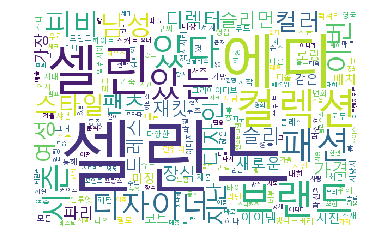

In [44]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('twitter_adj_noun_celine.png')

In [45]:
wc.generate_from_frequencies(dict(noun_list))
wc.to_file('twitter_noun_celine.png')